<a href="https://colab.research.google.com/github/matildapedretti-beep/Text-Media/blob/main/INFOTMA_Seminar2_Lab_solutions_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text and Media Analytics
### Seminar 2 Lab

This is the Google Colab notebook accompanying the second Seminar of the Applied Data Science *Text and Media Analytics* course at Utrecht University, the 2025/2026 edition.

We will cover three basic approaches to automatic text analysis: word-count-based methods, static embeddings and contextual embeddings. Along the way, we will try out various potential useful steps in the NLP pipeline.

## Some elements of the classic NLP pipeline

We worked a little bit with **NLTK** last week, but only used it for tokenization. In fact, NLTK offers many types of analysis along the NLP pipeline and is a (relatively) convenient single entry point for different types of tools and models. Let's see some things it can do.

In [ ]:
# first, let's kill warnings, so that they don't distract us
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# let's import nltk and some of its components
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

# If you need quick and easy access to a corpus to try something out, access via NLTK Corpus module is a good option https://www.nltk.org/api/nltk.corpus.html
from nltk.corpus import reuters

nltk.download('reuters')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...


True

Once you download a corpus, you can either just use the raw text, or load it pre-tokenized as a list of words, or a list of sentences, each of which is, in turn, a list of words, etc.

In [ ]:
print('Raw corpus:', reuters.raw()[:35])
print('Corpus as a list of words:', reuters.words()[:5])
print('Corpus as a list of sentences (here is the first one):', reuters.sents()[0])

Raw corpus: ASIAN EXPORTERS FEAR DAMAGE FROM U.
Corpus as a list of words: ['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM']
Corpus as a list of sentences (here is the first one): ['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.']


Another thing NLTK offers is [Text](https://tedboy.github.io/nlps/generated/generated/nltk.Text.html) -- a wrapper around a sequence of words for initial text exploration.

In [ ]:
from nltk.text import Text

text = Text(reuters.words())

# finding words similar to a given word (by the contexts it's used in):
text.similar('finance')

the agriculture trade oil foreign prime pct energy increase sell japan
cut reduce commerce in a exports industry make of


**SpaCy** is another tool that we discussed previously. We only looked at its tokenization model, but in fact it provides analysis along the whole NLP pipeline.

So, let's look at what it can do. You might find it useful to check out [the info about SpaCy English model that we will use](https://spacy.io/models/en) -- but also check out models for other languages that they have, including Dutch.

The pipeline includes [morphology](https://spacy.io/api/morphologizer) and a [syntactic parser](https://spacy.io/api/dependencyparser). Check out [the list of parts of speech and syntactic dependencies](https://spacy.io/models/en#en_core_web_trf-labels). Morphology follows [the format from Universal Dependencies](https://universaldependencies.org/format.html#morphological-annotation).

Basically, SpaCy keeps the analyzed text as a collection of tokens with a bunch of properties for these tokens. For instance, we can zoom in on the first 5 tokens and print parts of speech of each of them, next to the actual token, like this:


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")


sentence = 'This is a relatively simple example, I hope it can parse it.'

processed_sent = nlp(sentence)

for token in processed_sent:
  print(token.text, token.pos_)

This PRON
is AUX
a DET
relatively ADV
simple ADJ
example NOUN
, PUNCT
I PRON
hope VERB
it PRON
can AUX
parse VERB
it PRON
. PUNCT


Another thing we can do is to print all the morphological information per token:

In [ ]:
for token in processed_sent[:5]:
  print(token.text, token.morph)

This Number=Sing|PronType=Dem
is Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
a Definite=Ind|PronType=Art
relatively 
simple Degree=Pos


We can also check get values of a particular morphological feature we are interested in. This will give a list of values of this morphological feature for each word; if the token doesn't have any value for this feature, the resulting list will be empty. Let's get the value of the feature `Number` for the first 5 tokens:

In [ ]:
for token in processed_sent[:5]:
  print(token.text, token.morph.get('Number'))

This ['Sing']
is ['Sing']
a []
relatively []
simple []


Another thing you can do is to check what kind of syntactic role a token has -- in what kind of dependency relation it stands to some other token in the sentence. We can print, for each token, its syntactic head and the type of dependency between them:

In [ ]:
for token in processed_sent[:5]:
  print(token.text, token.head.text, token.dep_)

This is nsubj
is hope ccomp
a example det
relatively simple advmod
simple example amod


It might be useful to visualize the dependency structure sometimes -- you can use DisplaCy for this purpose, like in this example below:

In [ ]:
from spacy import displacy

displacy.render(processed_sent, style="dep", jupyter=True)

Displacy can visualize not only syntactic structures, but also named entities:

In [ ]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million. '
         u'By contrast, Sony sold only 7 thousand Walkman music players.')

displacy.render(doc, style='ent', jupyter=True)

There are many ways to use the annotation SpaCy and other tools provide -- the use of structured linguistic information about the text is limited only by your imagination and by the task at hand. Here, for instance, we transform the sentence so that the result is the lemmas of all the verbs, with all the stopwords kicked out:

In [ ]:
sentence = 'This is a relatively simple example, I hope it can parse it.'
processed_sent = nlp(sentence)

result = [word.lemma_ for word in processed_sent if word.pos_ == 'VERB' and not word.is_stop]
print(result)

['hope', 'parse']


# Seminar 2 Exercises: Part I

In this exercise, we will topic analysis with Latent Dirichlet Allocation, following lecture material. Optionally, you can compare the result with K-Means clustering on top of TF-IDF vectors.

First of all, let's download the data that we will work with for our exercises. This is just some collection of news articles.


In [ ]:
! wget https://raw.githubusercontent.com/bylinina/TMA_seminars/refs/heads/main/news_sample.csv

--2025-11-17 21:54:44--  https://raw.githubusercontent.com/bylinina/TMA_seminars/refs/heads/main/news_sample.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16044521 (15M) [text/plain]
Saving to: ‘news_sample.csv’

news_sample.csv     100%[===================>]  15.30M  --.-KB/s    in 0.06s   

2025-11-17 21:54:44 (273 MB/s) - ‘news_sample.csv’ saved [16044521/16044521]



In [ ]:
# Some imports and installations. These are your tools for the exercises -- check out the documentation for these packages for guidelines on how they are used.

!pip install --upgrade kneed gensim

from nltk.corpus import stopwords
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import spacy
import string

from kneed import KneeLocator
from sklearn.cluster import KMeans
import sklearn

from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel
from gensim import corpora, models

import matplotlib.pyplot as plt

nltk.download('stopwords')

stop_words = stopwords.words('english')
nlp = spacy.load("en_core_web_sm")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 71.6 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


IA.1) Load the data as a df and explore it a bit. What's the shape of the df? What are the names of the columns? If something needs to be deleted for the df to look cleaner, do it.


In [ ]:
df = pd.read_csv('/content/news_sample.csv')
print(df.shape)
print(df.columns)
df = df.drop(columns=['Unnamed: 0'])
df.head(10)

(2000, 9)
Index(['Unnamed: 0', 'outlet', 'title', 'keywords', 'description', 'datetime',
       'authors', 'category', 'body'],
      dtype='object')


,outlet,title,keywords,description,datetime,authors,category,body
0,Wired,How to Watch Movies in Virtual Reality,"['meta', 'netflix', 'amazon prime', 'oculus', ...",Setting up a VR cinema is simple and proves yo...,2022-01-09 07:00:00,['Reece Rogers'],Gear,With bots and console resellers snatching away...
1,Guardian,Can we create a moral metaverse?,"['The metaverse', 'Virtual reality', 'Online a...","In the increasingly lifelike worlds of VR, hig...",2022-05-14 14:00:04,['Laurie Clarke'],Technology,Psychotherapist Nina Jane Patel had been on F...
2,NYT,"92nd Street Y to Host Ron Howard, Gwyneth Palt...","['Books', 'Ninety-Second Street Y', 'Gwyneth P...",The 2019-20 season also features appearances b...,2019-07-17 17:00:04,Sara Aridi,Arts,The upcoming season at 92nd Street Y will feat...
3,NYT,Steven Spielberg on Storytelling’s Power to Fi...,"['Steven Spielberg', 'Shoah Foundation', 'War ...","The director is reissuing “Schindler’s List,” ...",2018-12-18 20:19:54,Adam Popescu,Arts,"LOS ANGELES — “Pinchas, how old are you?” Stev..."
4,Wired,Mass Transit Is in Jeopardy—and So Are Cities,"['public transportation', 'mass transit', 'cit...",Subways and buses are the lifeblood of dense c...,2020-12-14 07:00:00,['Aarian Marshall'],Business,"In the New York City of February 2020, a misse..."
5,Wired,What Is a Robot?,['robotics'],"Introducing ""HardWIRED: Welcome to the Robotic...",2017-08-24 07:00:00,['Matt Simon'],Science,Editor’s note: This is the first entry in a ne...
6,NYT,Misgivings Spoil Plans of Start-Up,"['Bill Clinton', 'SEC', 'Stocks;Bonds', 'Manha...",An underwriter has pulled out of the initial p...,2007-08-22 04:00:00,Saul Hansell,Technology,"Three years ago, at a news conference at Taver..."
7,Wired,The Best Coffee Subscriptions We’ve Savored,"['shopping', 'buying guides', 'coffee', 'kitch...","These services deliver freshly roasted, delici...",2022-04-23 08:00:00,"['Scott Gilbertson', 'Jaina Grey']",Gear,A cup of coffee in the morning is not just ab...
8,NYT,The Robots Are Coming. Prepare for Trouble.,"['Jobs', 'E Commerce', 'Retail', 'Car Service'...",Artificial intelligence won’t eliminate every ...,2020-01-30 10:00:27,David Deming,Business,Americans are worried that technology will soo...
9,Wired,"Your Favorite Sci-Fi Movies, 2000 and Beyond","['movies', 'sci-fi']",You don’t need to set the time machine very fa...,2009-12-08 20:00:00,['Lewis Wallace'],Culture,<< previous image | next image >> ...


IA.2) Run the news texts (``body``) through the SpaCy pipeline and put the result in a new column. You may need to convert the columns into the right data type (str) before you can proceeed.

In [ ]:
#First, convert the respective column into a string - otherwise, you'll run into an error.
#For more about .astype check https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
df['body'] = df['body'].astype(str)

#Create new column with processed texts - this may take a few minutes!
df['text_nlp'] = df['body'].apply(lambda x: nlp(x))
df.head()

,outlet,title,keywords,description,datetime,authors,category,body,text_nlp
0,Wired,How to Watch Movies in Virtual Reality,"['meta', 'netflix', 'amazon prime', 'oculus', ...",Setting up a VR cinema is simple and proves yo...,2022-01-09 07:00:00,['Reece Rogers'],Gear,With bots and console resellers snatching away...,"(With, bots, and, console, resellers, snatchin..."
1,Guardian,Can we create a moral metaverse?,"['The metaverse', 'Virtual reality', 'Online a...","In the increasingly lifelike worlds of VR, hig...",2022-05-14 14:00:04,['Laurie Clarke'],Technology,Psychotherapist Nina Jane Patel had been on F...,"( , Psychotherapist, Nina, Jane, Patel, had, b..."
2,NYT,"92nd Street Y to Host Ron Howard, Gwyneth Palt...","['Books', 'Ninety-Second Street Y', 'Gwyneth P...",The 2019-20 season also features appearances b...,2019-07-17 17:00:04,Sara Aridi,Arts,The upcoming season at 92nd Street Y will feat...,"(The, upcoming, season, at, 92nd, Street, Y, w..."
3,NYT,Steven Spielberg on Storytelling’s Power to Fi...,"['Steven Spielberg', 'Shoah Foundation', 'War ...","The director is reissuing “Schindler’s List,” ...",2018-12-18 20:19:54,Adam Popescu,Arts,"LOS ANGELES — “Pinchas, how old are you?” Stev...","(LOS, ANGELES, —, “, Pinchas, ,, how, old, are..."
4,Wired,Mass Transit Is in Jeopardy—and So Are Cities,"['public transportation', 'mass transit', 'cit...",Subways and buses are the lifeblood of dense c...,2020-12-14 07:00:00,['Aarian Marshall'],Business,"In the New York City of February 2020, a misse...","(In, the, New, York, City, of, February, 2020,..."


IA.3) Use Spacy to select words you want to keep/throw out! Does it make sense to keep all the words in? Maybe something could be kicked out based on parts of speech? Try different combinations and see how the results change later on. Also, clean the resulting texts: remove punctuation, digits, stopwords, lemmatize all words, put each of the texts back together into a string where each included lemma is separated by a space. Put the resulting clean texts into a new column (let's call it `clean_text`).

In [ ]:
def clean_text(text):

    #Students should experiment with different combinations and reflect on how this changes then results.

    #include_features = ['PERSON', 'LOC', 'NUM', 'VERB', 'AUX', 'ADP', 'ORG', 'GPE', 'MONEY', 'DATE']
    #include_features = ['VERB', 'PROPN', 'JJ']
    include_features = ['VERB', 'PROPN', 'NOUN', 'ADJ']

    text = ' '.join([ent.lemma_.strip() for ent in text if ent.pos_ in include_features and ent.text not in stop_words])

    # remove punctuation
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))

    # remove numbers
    text = text.translate(str.maketrans(' ', ' ', string.digits))

    # lowercase
    text = text.lower()

    return text

df['clean_text'] = df['text_nlp'].apply(lambda x: clean_text(x))
df['clean_text'].head()

,clean_text
0,bot console reseller snatch many people chance...
1,psychotherapist nina jane patel facebook horiz...
2,upcoming season nd street y feature ’ celebrit...
3,los angeles pinchas old steven spielberg ask w...
4,new york city february miss subway train nuisa...


IA.4) Use LDA topic modeling on the news data set. You can use the ``clean_text`` column from the dataframe -- but make sure to turn the strings into lists of words! Try different numbers of topics, calculate coherence scores and see if they can assist in determining the number of topics. Feel free to try different methods for calculating coherence.

In [ ]:
articles = df['clean_text'].apply(lambda x: x.split(' ')).copy()
articles

,clean_text
0,"[bot, console, reseller, snatch, many, people,..."
1,"[psychotherapist, nina, jane, patel, facebook,..."
2,"[upcoming, season, nd, street, y, feature, ’, ..."
3,"[los, angeles, pinchas, old, steven, spielberg..."
4,"[new, york, city, february, miss, subway, trai..."
...,...
1995,"[monitor, weekly, column, devote, happen, wire..."
1996,"[welcome, edition, monitor, wired, entertainme..."
1997,"[driverless, car, delivery, drone, new, genera..."
1998,"[washington, executive, facebook, twitter, goo..."


In [ ]:
#Use a function for the coherence score, try different coherence metrics ({'u_mass', 'c_v', 'c_uci', 'c_npmi'}, optional) and compare results.
#More info: https://radimrehurek.com/gensim/models/coherencemodel.html
#c_v = the closer to 1, "the better"
#u_mass = the closer to 0, "the better"

#Note: the coherence scores are not great for this dataset!
#That can have many reasons but also doesn't mean that the results are not interpretable.
#You can try to tweak the scores by excluding words, changing the feature selection etc.
#The way the news cover the topic in the articles might be rather homogenous.
#In any case, human validation of topics is needed!

#Function for calculating coherence scores
def coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Calculating for',num_topics,'topics')
        model = LdaModel(corpus=corpus, num_topics=num_topics)
        model_list.append(model)

        #You can adjust the method for coherence here (replace 'c_v' with any other method from the list above)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

#create dictionary
id2word = corpora.Dictionary(articles.values)

#OPTIONAL: Filter out words that occur in less than 20 documents or more than 50% of the documents. You can experiment with different values here.
id2word.filter_extremes(no_below=10, no_above=0.4)

#Create corpus
corpus = [id2word.doc2bow(doc) for doc in articles.values]

start = 5
limit = 20
step = 1

model_list, coherence_values = coherence_values(dictionary=id2word, corpus=corpus, texts=articles.values, start=start, limit=limit, step=step)


Calculating for 5 topics


Calculating for 6 topics


Calculating for 7 topics


Calculating for 8 topics


Calculating for 9 topics


Calculating for 10 topics


Calculating for 11 topics


Calculating for 12 topics


Calculating for 13 topics


Calculating for 14 topics


Calculating for 15 topics


Calculating for 16 topics


Calculating for 17 topics


Calculating for 18 topics


Calculating for 19 topics


IA.5) Create a line plot with the coherence scores (using ``CoherenceModel`` from ``gensim.models``) with number of clusters/topics on the x-axis and the scores on the y-axis.

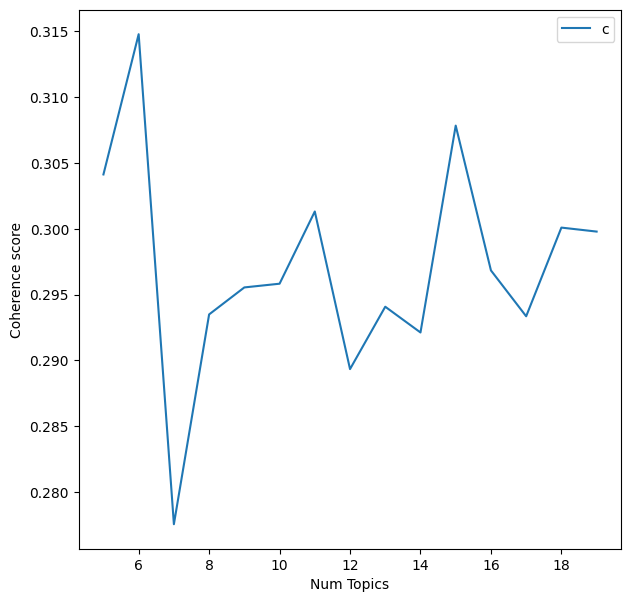

In [ ]:
#Visualise the coherence scores in a plot
x = range(start, limit, step)
plt.figure(figsize=(7,7))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

IA.6) Print out coherence values per number of topics.

In [ ]:
#list the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.3041
Num Topics = 6  has Coherence Value of 0.3148
Num Topics = 7  has Coherence Value of 0.2776
Num Topics = 8  has Coherence Value of 0.2935
Num Topics = 9  has Coherence Value of 0.2955
Num Topics = 10  has Coherence Value of 0.2958
Num Topics = 11  has Coherence Value of 0.3013
Num Topics = 12  has Coherence Value of 0.2893
Num Topics = 13  has Coherence Value of 0.2941
Num Topics = 14  has Coherence Value of 0.2921
Num Topics = 15  has Coherence Value of 0.3078
Num Topics = 16  has Coherence Value of 0.2968
Num Topics = 17  has Coherence Value of 0.2934
Num Topics = 18  has Coherence Value of 0.3001
Num Topics = 19  has Coherence Value of 0.2998


IA.7) Choose a K and do the LDA! Explore the result -- print out word mixes for each of the resulting topics using ``print_topics()``

In [ ]:
#Adjust num_topics to nmuber of topics with highest coherence score. Check if the results are intepretable as topics.
#It perfectly fine to try different numbers of topics as coherence score merely offer orientation but do not necessarily indicate clear topics.
model = LdaModel(corpus=corpus, num_topics=6,id2word=id2word)
model.print_topics()

[(0,
  '0.003*"game" + 0.003*"ai" + 0.002*"datum" + 0.002*"service" + 0.002*"lot" + 0.002*"us" + 0.002*"problem" + 0.002*"home" + 0.002*"device" + 0.002*"computer"'),
 (1,
  '0.004*"mr" + 0.003*"ai" + 0.003*"feel" + 0.003*"game" + 0.002*"google" + 0.002*"problem" + 0.002*"video" + 0.002*"china" + 0.002*"write" + 0.002*"user"'),
 (2,
  '0.004*"mr" + 0.003*"group" + 0.003*"ai" + 0.003*"google" + 0.003*"facebook" + 0.003*"country" + 0.002*"percent" + 0.002*"computer" + 0.002*"datum" + 0.002*"site"'),
 (3,
  '0.005*"google" + 0.004*"ai" + 0.004*"mr" + 0.003*"game" + 0.003*"facebook" + 0.003*"datum" + 0.003*"play" + 0.002*"video" + 0.002*"research" + 0.002*"tech"'),
 (4,
  '0.004*"ai" + 0.003*"robot" + 0.003*"game" + 0.002*"datum" + 0.002*"business" + 0.002*"feature" + 0.002*"computer" + 0.002*"us" + 0.002*"google" + 0.002*"tech"'),
 (5,
  '0.004*"datum" + 0.004*"game" + 0.004*"facebook" + 0.003*"ai" + 0.003*"google" + 0.003*"content" + 0.003*"mr" + 0.003*"video" + 0.003*"app" + 0.002*"writ

**OPTIONAL**: Compare with TF-IDF based clustering

IB.1) Vectorize ``clean_text`` and calculate TF-IDF!

In [ ]:
#Vectorization tf_idf
vectorizer = TfidfVectorizer(min_df=2, max_df=0.4, norm='l2')
X = vectorizer.fit_transform(df['clean_text'])
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())
tf_idf

,aaa,aarian,aarjav,aaron,ab,ababa,abalone,abandon,abandonment,abate,...,zürich,ángel,ça,école,élan,élysée,état,être,δt,σa
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.025767,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


IB.2) Perform KMeans clustering for a range of the number of clusters and create a line plot with the number of clusters on the x axis and the sum of square distances on the y axis. Find the optimal number of clusters, perform clustering with this number of clusters and add column to the dataframe that indicates what cluster an article belongs to.

3


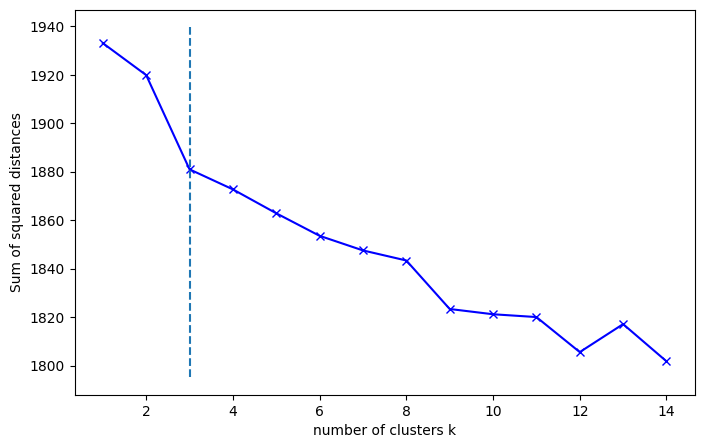

In [ ]:
inertia = []

K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tf_idf)
    inertia.append(kmeanModel.inertia_)

kn = KneeLocator(K, inertia, curve='convex', direction='decreasing')
print(kn.knee)

plt.figure(figsize=(8,5))
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(K, inertia, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [ ]:
#Enter recommended number of clusters and add k_means as a new column in the dataframe
clusters = 3
kmeanModel = KMeans(n_clusters=clusters, init='k-means++', max_iter=3000, random_state=0)
mod = kmeanModel.fit_transform(tf_idf)
df['k_means'] = kmeanModel.predict(tf_idf)

IB.3) Check the top words (e.g., 10 or 15) per cluster. Try labelling the clusters as topics or media frames.

In [ ]:
#Top words per cluster (15, adjust as needed)
order_centroids = kmeanModel.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
dict = []
for i in range(clusters):
    print("%d" % i, sep='', end=','),
    for ind in order_centroids[i, :15]:
        print(terms[ind], sep='', end=',')
    print('')

0,nan,facebook,computer,write,public,video,real,internet,view,feature,happen,information,google,post,right,
1,game,robot,ai,machine,car,computer,play,player,feel,film,science,story,researcher,space,datum,
2,mr,facebook,google,content,ai,datum,china,user,tech,trump,app,government,apple,security,us,


IB.4) Check the cluster sizes

In [ ]:
#cluster sizes
df.groupby('k_means').count().reset_index()[['k_means', 'title']]

,k_means,title
0,0,39
1,1,1151
2,2,810


IB.5) Reflect on the TF-IDF approach. What are the benefits, what are the limitations? How can you ensure validity and reliability of the results?

In [ ]:
# smth

IB.6) Compare the results of TF-IDF and LDA topic modeling. What are the differences? How can you explain them? Maybe you can try same number of clusters for TF-IDF and number of topics for LDA and then compare most important respective words. How different are the results?

In [ ]:
#Note: the LDA results aren't great and there are many reasons for why that could be - preprocessing, the data, the parameters, chosen metrics...
#It is the students' challenge to improve the results and reflect on the process
#There is no single 'correct' answer for these exercises
#What is important is to understand the impact of choices along the way and the variability of results

# Seminar 2 Exercises: Part II

In this part, we will look at embeddings, using text classification as our running example. We will look at classification based on

1) Tf-Idf vectors;

2) Static dense embeddings;

3) Contextual embeddings.


First, as usual, let's get our data. We are going to use a [dataset of 16,086 article titles](https://github.com/bhargaviparanjape/clickbait) that are either labelled as `clickbait` (1) or `not clickbait` (0). The dataset is introduced in this paper:

> Abhijnan Chakraborty, Bhargavi Paranjape, Sourya Kakarla, and Niloy Ganguly. "[Stop Clickbait: Detecting and Preventing Clickbaits in Online News Media](https://ieeexplore.ieee.org/document/7752207)”. In Proceedings of the 2016 IEEE/ACM International Conference on Advances in Social Networks Analysis and Mining (ASONAM), San Fransisco, US, August 2016.

We can load the datset from the following url:


In [ ]:
import pandas as pd

DATASET_URL = 'https://gist.githubusercontent.com/amitness/0a2ddbcb61c34eab04bad5a17fd8c86b/raw/66ad13dfac4bd1201e09726677dd8ba8048bb8af/clickbait.csv'
df = pd.read_csv(DATASET_URL)
df.head(5)

,title,label
0,"15 Highly Important Questions About Adulthood,...",1
1,250 Nuns Just Cycled All The Way From Kathmand...,1
2,"Australian comedians ""could have been shot"" du...",0
3,Lycos launches screensaver to increase spammer...,0
4,Fußball-Bundesliga 2008–09: Goalkeeper Butt si...,0


## Tf-Idf + logistic regression (the baseline)

Let's start with putting together a simple baseline with logistic regression based on Tf-Idf features. First, we split our dataset into training and test sets -- to be able to see model performance on data unseen during training.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.title.values
y = df.label.values # the labels we want to predict
labels = ['not clickbait', 'clickbait']

X_train_str, X_test_str, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

We reserved 20% of the data set for the test set. Generally, having more training data will improve your models performance, so don’t reserve too much - especially when your data set is small. On the other hand, too little test data makes your estimate of the performance of your model more unreliable.

Now, let's vectorize the texts -- for now, with Tf-Idf:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(X_train_str) # create the vocabulary

X_train = tfidf.transform(X_train_str)
X_test = tfidf.transform(X_test_str)

Now we have our features ready, let’s train the Logistic Regression classifier. In logistic regression, we learn for each element ``xᵢ`` in our input vector ``x`` (weighted frequencies of all the words in the corpus) a corresponding weight ``wᵢ``, in combination with a bias term ``b``. We transform the linear combination of ``w``, ``x``, and ``b`` (``wx + b``) via the sigmoid function to a probability between 0 and 1. Conventionally, if the probability of a title being clickbait is higher than 0.5, we classify it as a clickbait title, otherwise a classify it as non-clickbait.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression()

We’ve trained our model. How do measure its performance? We let it predict the labels of texts from the test sest using `predict()`, and compare its results with the true labels:

In [ ]:
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred,
                          target_names=labels, digits=4))

               precision    recall  f1-score   support

not clickbait     0.9567    0.9736    0.9651      3178
    clickbait     0.9735    0.9565    0.9649      3220

     accuracy                         0.9650      6398
    macro avg     0.9651    0.9650    0.9650      6398
 weighted avg     0.9651    0.9650    0.9650      6398



Not bad! Accuracy of 96.5%! Apart from accuracy, we see three evaluation metrics listed here: `precision`, `recall`, and `f1-score`. The precision of clickbait, for example, is the proportion of titles the model classified as clickbait that are correctly classified. If a model classified 10 posts as clickbait, and 8 of them were actually clickbait, the precision would be 0.80. Recall, on the other hand, indicates the proportion of the titles that are actually clickbait that are also found by the model. If there were 16 posts in the dataset that are labeled as clickbait, and the model found 8 of them correctly, the recall would be 0.5. Finally, `f1-score` is the harmonic mean of precision and recall.

How do we interpret these numbers? Generally, the higher the better, and it depends on your goal how high you want your metrics to be (if you don’t mind important emails to be classified as spam, you’ll be fine with a precision of 0.6). But there is an absolute minimum: you want your model to be better than random, better than just flipping a coin. In the case of binary classification, random baseline is 50%. Let us see what a random prediction between 0 and 1 actually produces:

In [ ]:
import random

random_preds = [random.randint(0,1) for i in range(len(y_test))]

print(classification_report(y_test, random_preds,
                          target_names=labels, digits=4))

               precision    recall  f1-score   support

not clickbait     0.5064    0.5079    0.5071      3178
    clickbait     0.5129    0.5115    0.5122      3220

     accuracy                         0.5097      6398
    macro avg     0.5097    0.5097    0.5097      6398
 weighted avg     0.5097    0.5097    0.5097      6398



## Static embeddings + logistic regression

During the lecture, we talked about representing words -- or bigger units of text, like documents -- as dense vectors of some pre-set length. Those vectors are trained on large corpora, and then they can be reused for different tasks. These word embeddings are usually called 'static' in a sense that there's one vector associated with every word, and that's it -- regardless of the context the word is used in, its vector is fixed once it's trained! There is no way to, for instance, alter the embeddings of an ambiguous word depending on which meaning it's used in in different sentences.

Static word embeddings come in a variety of implementations and versions (the Word2Vec family of embeddings; Glove, Fasttext) and are useful for a variety of tasks -- let's try them on clickbait title classification! `Spacy` offers static word embeddings (of length 300) as part of its pipeline, we will use them.



In [ ]:
! python -m spacy download en_core_web_sm

import spacy

nlp = spacy.load("en_core_web_sm")
nlp.select_pipes(disable=["ner", "parser"])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 135.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


['ner', 'parser']

You can access an embedding of every token of a document processed by Spacy (if you want to trh more things with static embeddings, check out [this Colab](https://colab.research.google.com/drive/1w1N4LIWo-rKeqstjLv_9V31-KHQLEaWH?usp=sharing)):

In [ ]:
nlp('dog')[0].vector

array([-0.27226907, -0.9383611 ,  0.53577745,  0.44520932,  0.3825763 ,
       -0.9749172 ,  0.8469627 ,  0.67455715, -0.25771007, -0.27247453,
        1.1028786 , -0.3597075 , -0.38521084,  0.04651603, -0.14505345,
        1.5175976 , -0.7354001 , -0.84961456,  0.40694216, -0.35687286,
       -0.66881883,  1.2842278 , -0.38473085, -0.1455772 ,  0.5863495 ,
        0.89835197,  1.1753088 , -0.7089511 , -0.79900444,  0.7978039 ,
       -0.39777118,  1.030055  ,  0.5468587 ,  0.2713221 , -0.67103904,
       -1.2529368 ,  0.31320012,  1.1285927 ,  0.02641793, -0.06576932,
       -0.22658798, -0.4484976 , -0.08686772,  0.34801936,  0.16308908,
        0.3185501 , -0.6068995 , -0.81285954, -0.13207741, -0.39623153,
        0.4158281 ,  0.02532491, -0.15275663, -0.83847266,  0.69083273,
        0.506855  ,  1.50522   , -0.6345062 ,  0.23774838, -0.1408023 ,
       -1.3257025 ,  0.636086  , -0.47730675, -0.24139926, -0.01089415,
        0.6481189 ,  0.61483896, -0.88111126, -1.2229419 , -0.16

In fact, Spacy also provides vectors for larger text units (sentences, documents) -- by averaging embeddings of their individual words. Check this out -- we can take a sequence embedding that Spacy suggests, and also manually average across word-by-word embeddings, and then show that the result is the same:

In [ ]:
import numpy as np

emb_spacy = nlp("I don't have a dog").vector

emb_average = [x.vector for x in nlp("I don't have a dog")]
emb_average = sum(emb_average) / len(emb_average)

(emb_spacy == emb_average).all()

np.True_

We can use these document embeddings as features for whatever model we are interested in training. For instance, quite like with Tf-Idf above, we can train a Logistic Regression model for clickbait title detection. Let's reuse our train-test split from before, but now vectorize the texts with Spacy text embeddings (takes a bit of time):

In [ ]:
X_train = [nlp(x).vector for x in X_train_str]
X_test = [nlp(x).vector for x in X_test_str]

Now we can just fit a logistic regression model as before and check out the results:

In [ ]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred,
                          target_names=labels, digits=4))

               precision    recall  f1-score   support

not clickbait     0.9713    0.9594    0.9653      3178
    clickbait     0.9604    0.9720    0.9662      3220

     accuracy                         0.9658      6398
    macro avg     0.9659    0.9657    0.9658      6398
 weighted avg     0.9658    0.9658    0.9658      6398



Maybe a little bit better than before, but not dramatically so. I guess that's not a surprise -- the representation the model works with is still BoW, although a slightly more sophisticated one: we just average all words' vectors, and their order, for instance, is not taken into account. Time to move on to contextualized embeddings!

# Contextual embeddings

As you know, the order of words can be very important. *The man killed the lion* and *The lion killed the man* are two completely different stories but they have exactly the same BoW representation, so we might want something beyond that -- something where embeddings of individual tokens interact with each other depending on their position in the text. A big class of models that does exactly that is Transformer models we discussed during the lecture this week: they use a so-called self-attention mechanism to get an idea on how relevant every other word in the sentence is for the current word (if you like to know more about how Transformers models work, also check out the [original BERT paper](https://https://arxiv.org/abs/1810.04805)).

Today, we will look at one example of a model that does that -- an **encoder** model of the BERT family (recall the discussion about the distinction between encoder models, decoder models and encoder-models from the lecture). Encoder models are typically used for tasks of text classification. We will use DistilBERT -- a pretty small but well-performing model from the BERT family.

The way these models are typically used involves fine-tuning: a pre-trained model (that was trained usually either for next-token prediction or masked-token prediction on a huge amount of texts) gets trained a little bit more for a downstream task. The hope is that the model acquired during pre-training will help it with the final task -- and that would be better than training a model for the downstream task from scratch. This is known as 'transfer learning' and it works pretty well!

We will fine-tune a pre-trained DistilBERT model using Huggingface's [Trainer](https://huggingface.co/docs/transformers/en/main_classes/trainer) class that supports training with PyTorch in a pretty compact way. Because fine-tuning these bigger models requires a lot of computational power, it is really not advised to train it on your own computer, unless you have a GPU. When you use Google Colab, make sure you use a GPU (Runtime > Change runtime type > GPU).

First, let's prepare the data. In order to save training time, let's use just 5k examples for training and 500 examples for evaluation. To prepare the data for Trainer, let's use the Dataset class:

In [ ]:
from datasets import Dataset

train_data = Dataset.from_pandas(df.head(5000))
eval_data = Dataset.from_pandas(df.tail(500))

In order to run the model on the text data, we need to tokenize it -- with the tokenizer that comes with the model! Let's do it both for train and eval data.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["title"], padding="max_length", truncation=True)


train_dataset = train_data.map(tokenize_function, batched=True).shuffle(seed=42)
eval_dataset = eval_data.map(tokenize_function, batched=True)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Now, let's load the actual model with its pre-trained weights! Once you do it using the `AutoModelForSequenceClassification` class, you will see a warning that some weights are newly initialized and need to be trained. That's because this class adds a linear layer on top of the pre-trained model that is responsible for the actual classification task, with the number of output classes that corresponds to the number of labels for your classification that you specify when you load the model (`num_labels` argument). The weights in this layer are random when you load the model, so some training is needed!

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-cased", num_labels=2)

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


We are almost ready to train. We need to do some annoying things first to disable Trainer's attempts to connect us to Weights&Biases and send stuff there. Don't think about it too much.

In [ ]:
import os
import wandb
os.environ["WANDB_DISABLED"] = "true"

Now, time to specify training arguments and initialize Trainer with these arguments:

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer",
                                  eval_strategy="no",
                                  num_train_epochs=1,
                                  save_strategy="no",
                                  report_to="none")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset)

Ok, let's train!!

In [ ]:
trainer.train()

Step,Training Loss
500,0.088500


TrainOutput(global_step=625, training_loss=0.07957009735107422, metrics={'train_runtime': 221.6336, 'train_samples_per_second': 22.56, 'train_steps_per_second': 2.82, 'total_flos': 662336993280000.0, 'train_loss': 0.07957009735107422, 'epoch': 1.0})

Now we can use the result of this training to predict labels for new data -- we set aside evaluation data for this purpose. Let's see what the model does with it!

In [ ]:
predictions = trainer.predict(eval_dataset)
y_pred = np.argmax(predictions.predictions, axis=-1)
y_test = predictions.label_ids

print(classification_report(y_test, y_pred,
                          target_names=labels, digits=4))

               precision    recall  f1-score   support

not clickbait     0.9959    0.9919    0.9939       246
    clickbait     0.9922    0.9961    0.9941       254

     accuracy                         0.9940       500
    macro avg     0.9940    0.9940    0.9940       500
 weighted avg     0.9940    0.9940    0.9940       500



Awesome. Let's clean up.

In [ ]:
import torch
import gc

del model, trainer

if torch.cuda.is_available():
    torch.cuda.empty_cache()

gc.collect()

60

## Seminar 2 Exercises: Part III

### IIIA: Classification with different vectorizations

Earlier, we looked at Tf-Idf vs. static embeddings as the basis of classification with Logistic Regression and barely saw improvement when we switched from Tf-Idf as features to static embeddings offered by SpaCy. Is this a stable result? Do the same thing we did above but using different types of classifiers. Pick at least one alternative classifier model! Suggested classifiers are

```
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
```

Check on the Scikit Learn pages which hyperparameters these classifiers have. Not specifying hyperparameters means that run on default values. You can also try to combine classifiers into ensembles, with a voting classifier on top.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = df.title.values
y = df.label.values # the labels we want to predict
labels = ['not clickbait', 'clickbait']

X_train_str, X_test_str, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

tfidf = TfidfVectorizer()
tfidf.fit(X_train_str) # create the vocabulary

X_train_tfidf = tfidf.transform(X_train_str)
X_test_tfidf = tfidf.transform(X_test_str)

X_train_emb = [nlp(x).vector for x in X_train_str]
X_test_emb = [nlp(x).vector for x in X_test_str]

kn = KNeighborsClassifier()
kn.fit(X_train_tfidf, y_train)

y_pred = kn.predict(X_test_tfidf)

print('TF-IDF:')
print(classification_report(y_test, y_pred,
                          target_names=labels, digits=4))

kn = KNeighborsClassifier()
kn.fit(X_train_emb, y_train)

y_pred = kn.predict(X_test_emb)

print('Spacy static embeddings:')
print(classification_report(y_test, y_pred,
                          target_names=labels, digits=4))

TF-IDF:
               precision    recall  f1-score   support

not clickbait     0.9771    0.9122    0.9435      3178
    clickbait     0.9187    0.9789    0.9478      3220

     accuracy                         0.9458      6398
    macro avg     0.9479    0.9455    0.9457      6398
 weighted avg     0.9477    0.9458    0.9457      6398

Spacy static embeddings:
               precision    recall  f1-score   support

not clickbait     0.9858    0.9364    0.9605      3178
    clickbait     0.9402    0.9866    0.9629      3220

     accuracy                         0.9617      6398
    macro avg     0.9630    0.9615    0.9617      6398
 weighted avg     0.9628    0.9617    0.9617      6398



### IIIB: Fine-tuning vs. contextual embeddings as features

When we talked about the benefit of contextual embeddings, we saw an example of fine-tuning a DistilBERT model with an added layer specifically for the binary classification task. During this process, the whole model was trained (all weights were adjusted, including the newly initialized ones). Could we just use embeddings produced by the encoder model as features of our favourite classification model? We certainly could. Would it work well? Let's see.

What should we use as an embedding of the whole text, given that DistilBERT produces embeddings for each token? There are different approaches -- we could average embeddings of all tokens and use that as a sequence embedding. Alternatively -- and more frequently -- the embedding of the special token `[CLS]` is used for this purpose. BERT tokenizers wrap sequences into special tokens, with `[CLS]` token in the beginning of the sequence. `[CLS]` stands for 'classification' so it's not a coincidence!

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")

tokenizer.decode(tokenizer.encode('This is a sentence'))

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

'[CLS] This is a sentence [SEP]'

Now, let's again load the DistilBERT model (now using a different class, without an added classfication layer!), and use the pre-tokenized 5k examples to run them through the model and get the embeddings that we need out of it. It will take a bit of time, hold tight!

In [ ]:
from transformers import AutoModel

model = AutoModel.from_pretrained("distilbert-base-cased")

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

In [ ]:
from tqdm import tqdm
import torch

model.to('cuda:0')
input_ids_train = torch.tensor(train_dataset['input_ids']).to('cuda:0')
attention_masks_train = torch.tensor(train_dataset['attention_mask']).to('cuda:0')

encoded = []
for row in tqdm(range(len(train_dataset))):
  with torch.no_grad():
    embeds = model(input_ids=input_ids_train[row:row+1,:], attention_mask=attention_masks_train[row:row+1,:]).last_hidden_state.squeeze(dim=0).to('cpu').detach().numpy()
  encoded.append(embeds)

100%|██████████| 5000/5000 [01:20<00:00, 62.08it/s]


Now, keep only the embedding of the very first token for each of the 5000 titles. Keep in mind that all examples were padded to the maximum sequence length that the model can take: 512. The size of the vector that corresponds to each of the tokens is 768.

In [ ]:
X_cls = [x[0] for x in encoded]
y_cls = train_dataset['label']

In [ ]:
import torch
import gc

del encoded

if torch.cuda.is_available():
    torch.cuda.empty_cache()

gc.collect()

505

Train a Logistic Regression on top of these features

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_cls, y_cls)

LogisticRegression()

Write a function that would take the pre-tokenized `eval_dataset` and return predictions - first running the dataset through the model, then extracting the embeddings of the `[CLS]` tokens, then running that through the logistic regression model. Evaluate the quality of your set-up.

In [ ]:
def predict_clickbait(dataset, model, lr):
  model.to('cuda:0')
  input_ids_train = torch.tensor(dataset['input_ids']).to('cuda:0')
  attention_masks_train = torch.tensor(dataset['attention_mask']).to('cuda:0')
  encoded = []

  for row in tqdm(range(len(dataset))):
    with torch.no_grad():
      embeds = model(input_ids=input_ids_train[row:row+1,:], attention_mask=attention_masks_train[row:row+1,:]).last_hidden_state.squeeze(dim=0).to('cpu').detach().numpy()
    encoded.append(embeds[0])

  preds = lr.predict(encoded)
  return preds

In [ ]:
from sklearn.metrics import classification_report

y_pred = predict_clickbait(eval_dataset, model, lr)
y_test = eval_dataset['label']

print(classification_report(y_test, y_pred,
                          target_names=['not clickbait', 'clickbait'], digits=4))

100%|██████████| 500/500 [00:08<00:00, 61.71it/s]

               precision    recall  f1-score   support

not clickbait     0.9796    0.9756    0.9776       246
    clickbait     0.9765    0.9803    0.9784       254

     accuracy                         0.9780       500
    macro avg     0.9780    0.9780    0.9780       500
 weighted avg     0.9780    0.9780    0.9780       500



Reflect on the results!

\[YOUR THOUGHTS HERE\]